# Pràctica 3 - El fluxe del procés d'aprenentatge

El procés d'aplicar tècniques d'aprenentatge automàtic consta
de més passes que la de triar i aplicar el classificador o regressor.
És un procés que consta de cinc parts:

- Tractament de les dades: preparació del conjunt de dades, selecció de característiques, **obtenció dels conjunts
d'entrenament / test**.

- **Selecció de la / les mètriques adients**.

- Selecció del classificador / regresor.

- **Avaluació del model**.

- Ajustament del model.




## Separació del conjunt de dades

Per tal de saber com funciona l'algorisme necessitarem dividir el nostre conjunt de dades en diverses parts disjuntes.
Típicament usarem el bloc més gran (entre el 60% i el 80%) per entrenar el nostre algorisme d'aprenentatge i la resta
per poder provar que l'algorisme prèviament entrenat funciona bé per dades noves, és a dir, que té la capacitat de
**generalitzar** allò que ha après. Aquest darrer conjunt es coneix amb el nom de *test*. Evitarem biaixos en els dos
conjunts fent aquesta divisió de manera aleatòria. És important no emprar el conjunt de test fins que no tenim el
model entrenat i ajustat, aquest conjunt només ha de servir per avaluar el model final.


La llibreria _scikit-learn_ té una funció que ens pot ser molt pràctica per fer aquesta feina:
[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test#sklearn.model_selection.train_test_split)

A continuació en podeu veure un exemple:

```
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)
```

## Mètriques

Un cop entrenat el nostre model, tenim la necessitat d'avaluar els resultats obtinguts amb aquest amb alguna
mesura que sigui objectiva. Les mesures que explicarem en aquesta secció es calculen a partir d'una matriu de
confusió que ens permet guardar quatre mesures bàsiques a partir de considerar que una de les classes és la positiva
i l'altra és la negativa.

- _True Positives_ (TP): L'algorisme classifica una mostra de la classe positiva com a membre de la classe
positiva.
- _True Negatives_ (TN): L'algorisme classifica una mostra de la classe negativa com a membre de la classe
negativa.
- _False Positives_ (FP): L'algorisme classifica una mostra de la classe negativa com a membre de la classe
positiva.
- _False Negatives_ (FN): L'algorisme classifica una mostra de la classe positiva com a membre de la classe
negativa.

Podem observar la matriu de confusió en el següent esquema:

![image](imatges/02_minimitzacio.png "font: Python Machine Learning")

Aquesta matriu es pot obtenir de manera senzilla usant la funció `confusion_matrix` de la llibreria [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion%20matrix#sklearn-metrics-confusion-matrix)
i es pot visualitzar amb la funció [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html?highlight=confusion%20matrix#sklearn-metrics-confusionmatrixdisplay)

A partir d'aquestes mesures de primer ordre en podem treure d'altres més completes:

$$ Error = \frac{FP+FN}{FP+FN+TP+TN}$$

$$ Exactitut = \frac{TP+TN}{FP+FN+TP+TN} = 1 - Error$$, també es coneix com _Accuracy_.

Per altra banda tenim les mesures Rati de Vertaders Positius (True Positive Rate, TPR) i el Rati de Falsos Positius
(False Positive Rate, FPR) que estan dissenyades per problemes on hi ha una classe amb més mostres que l'altra:

$$ FPR = \frac{FP}{N} = \frac{FP}{FP + TN} $$

$$ TPR = \frac{TP}{P} = \frac{TP}{FN+TP} $$

Finalment parlarem de precisió (_precision_) i la sensibilitat (_recall_) relacionades amb els ratis de vertaders
positius i vertaders negatius:

$$ Precisió = \frac{TP}{TP+FP} $$
$$ Sensibilitat = TPR = \frac{TP}{FN+TP} $$

Tenim una mesura que engloba aquestes mesures anteriors:

$$ F1 = 2 \frac{Precisio \times Sensibilitat}{Precisio + Sensibilitat}$$

Per sort tenim un mòdul anomenat _metrics_ on hi ha totes aquestes (i d'altres) mètriques ja implementades.


## Un exemple complet

A continuació teniu un exemple que resumeix el procés sencer emprant la llibreria `Scikit-learn`:

[[114   3]
 [  1  82]]
Accuracy:  0.98


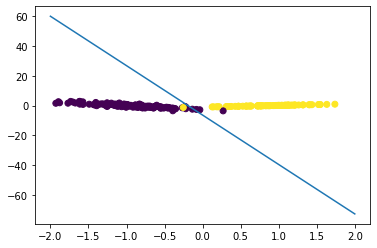

In [11]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=1, class_sep=2,
                           random_state=5)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SGDClassifier(loss="perceptron", eta0=1, max_iter=1000, learning_rate="constant", random_state=5)
clf.fit(X_train_scaled, y_train)
prediction = clf.predict(X_test_scaled)

cf_matrix = confusion_matrix(y_test, prediction)
print(cf_matrix)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: ", accuracy)


## Feina a fer

1. Dibuixar la recta de separació de l'exemple anterior.
2. Calcula la mètrica F1 usant la matriu de confusió de l'exemple. Compara-la amb l'obtinguda amb la funció de Scikit.
3. Repetir el procés anterior substituint el Perceptron per la Regressió Logística de Scikit. (No és necessari
calcular F1 a ma).
4. Compara els resultats obtinguts dels dos mètodes.

**Extra**: dibuixa la recta de decisió de cada mètode en el mateix gràfic, per comparar el resultat obtingut.

